## Rice Production Analysis

In the Wold indonetia has the 3rd highest rank in production of rice.In that data i can analyse to predict the what is the gross production of rice in prticuler or indivisul farm.

### Feature information

Id			    : the farm identifier.
Size_hector		:the total area cultivated with rice, measured in hector.
Status_land		:land status, on of ‘owner’ (non-sharecroppers, owner operators or leaseholders or both), ‘share’
                  (sharecroppers), ‘mixed’, (mixed of the two previous status).
Varieties		:one of ‘trad’ (traditional varieties), ‘high’ (high yielding varieties) and ‘mixed’  (mixed varieties).
Bimas		    :bimas is an intensification program; one of ‘no’ (non-bimas farmer), ‘yes’ (bimas farmer) or ‘mixed’ (part but                   not all of farmer’s land was registered to be in the bimas program).
Seed			:seed in kilogram.
Urea			:urea in kilogram.
Phosphate		:phosphate in kilogram pesticide.
Pesticide		:cost in Rupiah.
Pseed			: cost in Rupiah per kg.
Purea			: price of urea in Rupiah per kg.
Pphosph		    : price of phosphate in Rupiah per kg.
Hiredlabor		: hired labor in hours.
Famlabor		: family labor in hours total labor (excluding harvest labor).
Wage			: labor wage in Rupiah per hour.
Goutput		     : gross output of rice in kg.
Noutput		     :net output, gross output minus harvesting cost (paid in terms of rice).
Price			: price of rough rice in Rupiah per kg.
Region	        :one of ‘wargabinangun’, ‘langan’, ‘gunungwangi’, ‘malausma’, ‘sukaambit’, ‘firangi’.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

C:\Users\Sai\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [64]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [1]:
data=pd.read_csv('farm_rice.csv')

C:\Users\Sai\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<IPython.core.display.Javascript object>

In [2]:
data.head()

,id,size_hector,status_land,varieties,bimas,seed_kg,urea_kg,phosphate_kg,pesticide_rs,price_seed_rs/kg,price_urea,price_phosphate,working_labor,working_family_labor,Total_working_labor_hrs,wage /hrs,Gross _output_kg,net _output,price/kg,region
0,101001,3.000,owner,mixed,mixed,90,900,80,6000,80.0,75.0,75.0,2875,40,2915,68.49,7980,6800,60.0,wargabinangun
1,101001,2.000,owner,trad,mixed,40,600,0,3000,70.0,75.0,75.0,2110,45,2155,60.09,4083,3500,60.0,wargabinangun
2,101001,1.000,owner,high,mixed,100,700,150,5000,140.0,70.0,70.0,980,95,1075,51.99,2650,2242,65.0,wargabinangun
3,101001,2.000,owner,high,mixed,60,600,100,5000,90.0,70.0,70.0,2081,10,2091,56.98,4500,3750,70.0,wargabinangun
4,101001,3.572,share,high,no,105,400,400,10200,350.0,80.0,80.0,3889,1,3889,152.03,16300,13584,120.0,wargabinangun


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1026 non-null   int64  
 1   size_hector              1026 non-null   float64
 2   status_land              1026 non-null   object 
 3   varieties                1026 non-null   object 
 4   bimas                    1026 non-null   object 
 5   seed_kg                  1026 non-null   int64  
 6   urea_kg                  1026 non-null   int64  
 7   phosphate_kg             1026 non-null   int64  
 8   pesticide_rs             1026 non-null   int64  
 9   price_seed_rs/kg         1026 non-null   float64
 10  price_urea               1026 non-null   float64
 11  price_phosphate          1026 non-null   float64
 12  working_labor            1026 non-null   int64  
 13  working_family_labor     1026 non-null   int64  
 14  Total_working_labor_hrs 

In [4]:
data.isnull().sum()

id                         0
size_hector                0
status_land                0
varieties                  0
bimas                      0
seed_kg                    0
urea_kg                    0
phosphate_kg               0
pesticide_rs               0
price_seed_rs/kg           0
price_urea                 0
price_phosphate            0
working_labor              0
working_family_labor       0
Total_working_labor_hrs    0
wage /hrs                  0
Gross _output_kg           0
net _output                0
price/kg                   0
region                     0
dtype: int64

#### Find Harvesting cost in terms of price in Kg

In [5]:
data['Harve_cost_rice']=data['Gross _output_kg']-data['net _output']

#### droping the net_output column

In [6]:
data.drop(columns=['net _output'],inplace=True)

#### Also drop not importat feature

In [7]:
data.drop(columns=['id','bimas','working_labor','working_family_labor'],inplace=True)

In [8]:
data.head()

,size_hector,status_land,varieties,seed_kg,urea_kg,phosphate_kg,pesticide_rs,price_seed_rs/kg,price_urea,price_phosphate,Total_working_labor_hrs,wage /hrs,Gross _output_kg,price/kg,region,Harve_cost_rice
0,3.000,owner,mixed,90,900,80,6000,80.0,75.0,75.0,2915,68.49,7980,60.0,wargabinangun,1180
1,2.000,owner,trad,40,600,0,3000,70.0,75.0,75.0,2155,60.09,4083,60.0,wargabinangun,583
2,1.000,owner,high,100,700,150,5000,140.0,70.0,70.0,1075,51.99,2650,65.0,wargabinangun,408
3,2.000,owner,high,60,600,100,5000,90.0,70.0,70.0,2091,56.98,4500,70.0,wargabinangun,750
4,3.572,share,high,105,400,400,10200,350.0,80.0,80.0,3889,152.03,16300,120.0,wargabinangun,2716


### Lable Encoding in the data

In [9]:
dect={}
for i in list(data['region'].unique()):
    dect[i]=list(data['region'].unique()).index(i)

In [10]:
data['region']=data['region'].map(dect)

In [11]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data['status_land']=l1.fit_transform(data['status_land'])
data['varieties']=l1.fit_transform(data['varieties'])

In [12]:
data.head()

,size_hector,status_land,varieties,seed_kg,urea_kg,phosphate_kg,pesticide_rs,price_seed_rs/kg,price_urea,price_phosphate,Total_working_labor_hrs,wage /hrs,Gross _output_kg,price/kg,region,Harve_cost_rice
0,3.000,1,1,90,900,80,6000,80.0,75.0,75.0,2915,68.49,7980,60.0,0,1180
1,2.000,1,2,40,600,0,3000,70.0,75.0,75.0,2155,60.09,4083,60.0,0,583
2,1.000,1,0,100,700,150,5000,140.0,70.0,70.0,1075,51.99,2650,65.0,0,408
3,2.000,1,0,60,600,100,5000,90.0,70.0,70.0,2091,56.98,4500,70.0,0,750
4,3.572,2,0,105,400,400,10200,350.0,80.0,80.0,3889,152.03,16300,120.0,0,2716


In [13]:
data.describe()

,size_hector,status_land,varieties,seed_kg,urea_kg,phosphate_kg,pesticide_rs,price_seed_rs/kg,price_urea,price_phosphate,Total_working_labor_hrs,wage /hrs,Gross _output_kg,price/kg,region,Harve_cost_rice
count,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000
mean,0.431597,0.871345,1.378168,18.205653,95.440546,33.728070,595.004873,112.071598,78.979532,79.567739,388.447368,80.423275,1405.166667,90.961404,2.719298,164.246589
std,0.546780,0.516099,0.899469,45.250820,127.149226,47.588061,2927.580992,64.279795,8.674188,9.271885,484.203777,42.188804,1921.756965,37.495010,1.634732,295.607305
min,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,40.000000,50.000000,60.000000,17.000000,30.000000,42.000000,50.000000,0.000000,-260.000000
25%,0.143000,1.000000,0.000000,5.000000,25.000000,8.000000,0.000000,70.000000,70.000000,70.000000,144.000000,49.375000,420.000000,60.500000,1.000000,31.250000
50%,0.286000,1.000000,2.000000,10.000000,60.000000,20.000000,0.000000,81.000000,80.000000,80.000000,252.000000,57.140000,886.500000,75.000000,3.000000,90.000000
75%,0.500000,1.000000,2.000000,20.000000,100.000000,50.000000,265.000000,150.000000,85.000000,85.000000,435.000000,128.750000,1606.000000,120.000000,4.000000,187.000000
max,5.322000,2.000000,2.000000,1250.000000,1250.000000,700.000000,62600.000000,375.000000,100.000000,120.000000,4774.000000,175.350000,20960.000000,190.000000,5.000000,3350.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

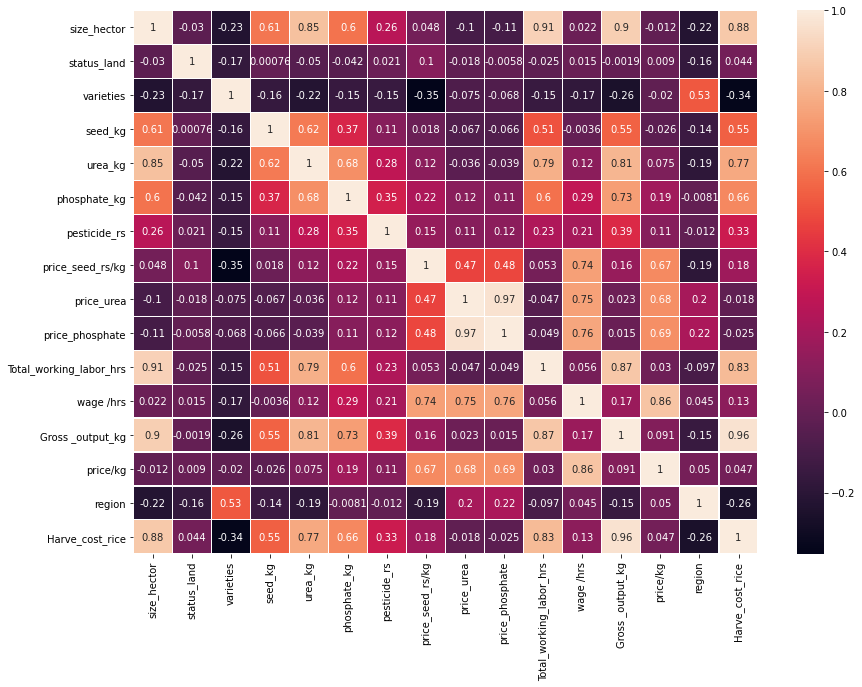

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.1)

### Analysis of rice Production

#### Harvesting cost is independant in gross_output  so we delete that variable to predicting gross output

In [15]:
data1=data.drop(columns=['Harve_cost_rice'])

In [16]:
data1.head()

,size_hector,status_land,varieties,seed_kg,urea_kg,phosphate_kg,pesticide_rs,price_seed_rs/kg,price_urea,price_phosphate,Total_working_labor_hrs,wage /hrs,Gross _output_kg,price/kg,region
0,3.000,1,1,90,900,80,6000,80.0,75.0,75.0,2915,68.49,7980,60.0,0
1,2.000,1,2,40,600,0,3000,70.0,75.0,75.0,2155,60.09,4083,60.0,0
2,1.000,1,0,100,700,150,5000,140.0,70.0,70.0,1075,51.99,2650,65.0,0
3,2.000,1,0,60,600,100,5000,90.0,70.0,70.0,2091,56.98,4500,70.0,0
4,3.572,2,0,105,400,400,10200,350.0,80.0,80.0,3889,152.03,16300,120.0,0


#### show the distribution of responce variable

<IPython.core.display.Javascript object>

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gross _output_kg', ylabel='Density'>

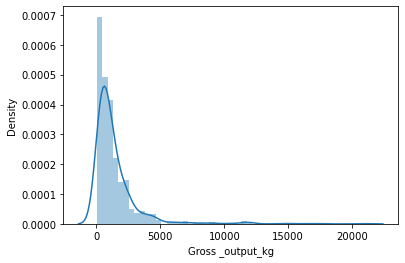

In [17]:
sns.distplot(data1['Gross _output_kg'])

#### Taking log to convert normal distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gross _output_kg', ylabel='Density'>

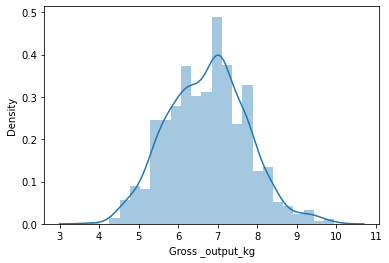

In [18]:
sns.distplot(np.log(data1['Gross _output_kg']))

#### Train Test spliting

In [19]:
x=data1.iloc[:,:-3]
y=data1.iloc[:,-3]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Feature selection

In [21]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train,y_train)

In [22]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

<IPython.core.display.Javascript object>

size_hector                0.931980
seed_kg                    0.724964
urea_kg                    0.704909
Total_working_labor_hrs    0.671706
phosphate_kg               0.440288
pesticide_rs               0.134676
varieties                  0.132673
status_land                0.087837
price_seed_rs/kg           0.062338
price_phosphate            0.043927
wage /hrs                  0.037736
price_urea                 0.033882
dtype: float64

<AxesSubplot:>

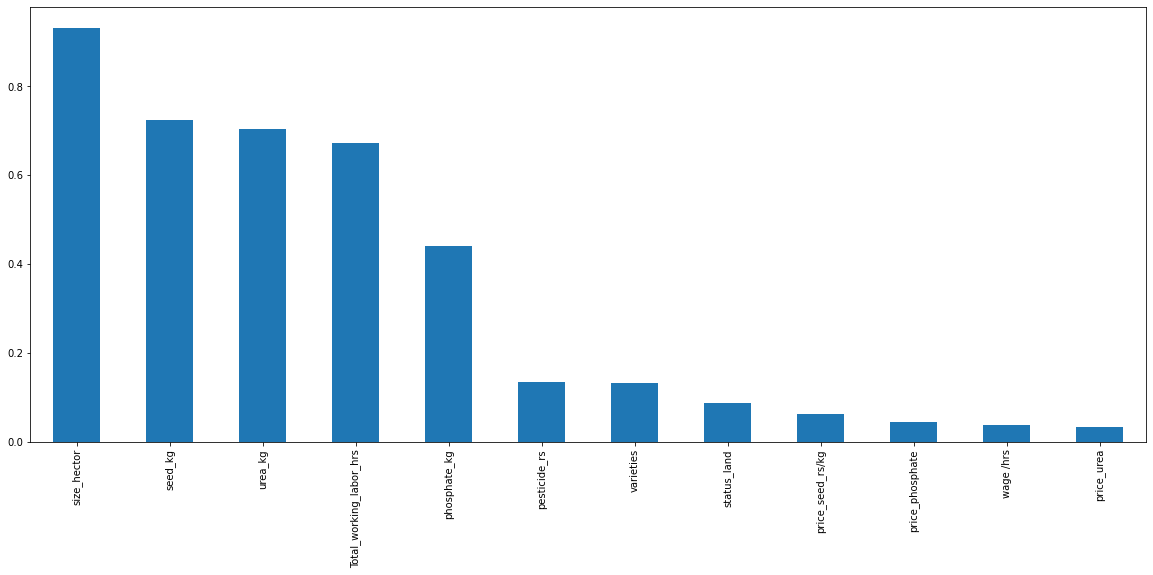

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8)) 

In [90]:
mutual_info.sort_values(ascending=False).index

Index(['size_hector', 'seed_kg', 'urea_kg', 'Total_working_labor_hrs',
       'phosphate_kg', 'varieties', 'pesticide_rs', 'status_land',
       'price_seed_rs/kg', 'price_phosphate', 'wage /hrs', 'price_urea'],
      dtype='object')

#### check those feature have the multicolinearity

In [91]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_features = correlation(x_train, 0.5)
corr_features                  

{'Total_working_labor_hrs',
 'phosphate_kg',
 'price_phosphate',
 'seed_kg',
 'urea_kg',
 'wage /hrs'}

In [92]:
x0=data1[list(mutual_info.sort_values(ascending=False).head(7).index)]
#x0=data1[['size_hector','varieties', 'pesticide_rs']]

In [98]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x0,y,test_size=0.2,random_state=0)

In [99]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import BaggingRegressor 

In [78]:
reg1 = LinearRegression()
lasso_reg = linear_model.Lasso(alpha=1, max_iter=100, tol=0.1)
ridge_reg= Ridge(alpha=1, max_iter=500, tol=0.5)
svr_rbf = SVR(kernel= 'linear')
dt = DecisionTreeRegressor( ccp_alpha=0.001)
model = neighbors.KNeighborsRegressor(n_neighbors = 5,metric='minkowski',p=1)
xgb_model = xgb.XGBRegressor(base_score=0.5,objective="reg:squarederror", random_state=100)


<IPython.core.display.Javascript object>

In [101]:
for clf in (reg1,dt,lasso_reg,ridge_reg,model,xgb_model):
    clf.fit(x1_train,y1_train)
    y_pred=clf.predict(x1_test)
    yp_pred=clf.predict(x1_train)
    print(f"output {clf} is : ",r2_score(y1_test,y_pred),r2_score(y1_train,yp_pred))

output LinearRegression() is :  0.8766466522883594 0.8838435514023488
output DecisionTreeRegressor(ccp_alpha=0.001) is :  0.3793637376778116 0.999902763074088
output Lasso(alpha=1, max_iter=100, tol=0.1) is :  0.8589710725298962 0.8784330424013227
output Ridge(alpha=1, max_iter=500, tol=0.5) is :  0.8760013954533453 0.883821402716902
output KNeighborsRegressor(p=1) is :  0.7610357078929504 0.8386920658447994
output XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
     

In [103]:
from sklearn.model_selection import StratifiedKFold
   #mi he k-fold  logistic regression cha model vr vaprun bghitl
strata_kfold=StratifiedKFold(n_splits=16,shuffle=True)    #dataset che 10 fold kele

from sklearn.model_selection import cross_val_score
results_s_kfold=cross_val_score(reg1,x1_train,y1_train,cv=strata_kfold)
print(results_s_kfold)
print(np.mean(results_s_kfold))
print(np.var(results_s_kfold))    #check the variation of the data

#r2.fit(x2_data,y2_data)
#y_pred=r2.predict(x_test)   #model chi pn accuracy bghitly
   

[0.71901957 0.85579709 0.8732424  0.69148774 0.8523549  0.80204506
 0.73082082 0.94280082 0.91347309 0.83304128 0.93776193 0.92256471
 0.71372614 0.82039801 0.91019417 0.89469767]
0.8383390885819223
0.006759585857610346


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=16.
  warnings.warn(


In [32]:
import pickle

In [105]:
pickle.dump(reg1,open('gross_output.pkl','wb'))

<IPython.core.display.Javascript object>

### Price Analysis

<IPython.core.display.Javascript object>

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price/kg', ylabel='Density'>

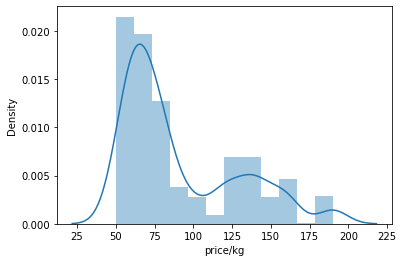

In [36]:
sns.distplot(data1['price/kg'])

In [37]:
x1=data1.iloc[:,:-2]
y1=data1.iloc[:,-2]

In [38]:
from sklearn.model_selection import train_test_split
x11_train,x11_test,y11_train,y11_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [39]:
from sklearn.feature_selection import mutual_info_regression
mutual_info1=mutual_info_regression(x11_train,y11_train)

In [40]:
mutual_info1 = pd.Series(mutual_info1)
mutual_info1.index = x11_train.columns
mutual_info1.sort_values(ascending=False)

<IPython.core.display.Javascript object>

price_seed_rs/kg           0.814231
wage /hrs                  0.751625
price_urea                 0.603078
price_phosphate            0.585392
varieties                  0.172104
phosphate_kg               0.146534
Gross _output_kg           0.094957
pesticide_rs               0.079115
size_hector                0.046631
Total_working_labor_hrs    0.044772
status_land                0.043486
seed_kg                    0.037402
urea_kg                    0.017443
dtype: float64

<AxesSubplot:>

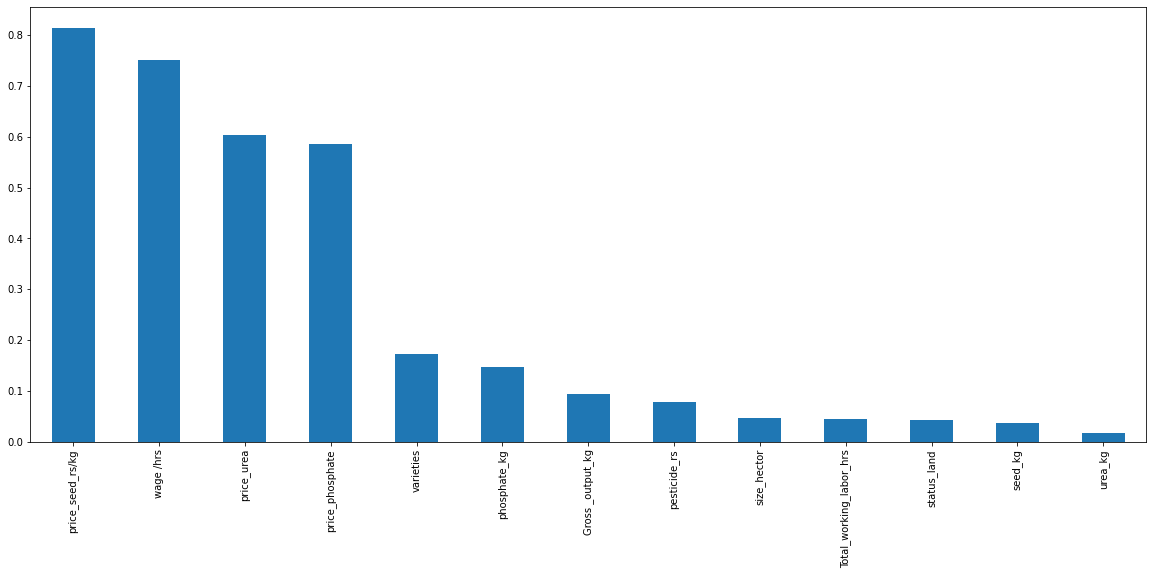

In [41]:
mutual_info1.sort_values(ascending=False).plot.bar(figsize=(20, 8)) 

In [42]:
mutual_info1.sort_values(ascending=False).index

Index(['price_seed_rs/kg', 'wage /hrs', 'price_urea', 'price_phosphate',
       'varieties', 'phosphate_kg', 'Gross _output_kg', 'pesticide_rs',
       'size_hector', 'Total_working_labor_hrs', 'status_land', 'seed_kg',
       'urea_kg'],
      dtype='object')

In [43]:
x11=data1[list(mutual_info1.sort_values(ascending=False).head(4).index)]
#x11=data1[['price_seed_rs/kg','wage /hrs']]

In [44]:
from sklearn.model_selection import train_test_split
x12_train,x12_test,y12_train,y12_test=train_test_split(x11,y1,test_size=0.2,random_state=3)

In [45]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
#from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn import svm

In [46]:
lasso_reg = linear_model.Lasso(alpha=1, max_iter=100, tol=0.1)
ridge_reg= Ridge(alpha=1, max_iter=500, tol=0.1)
svr_rbf = SVR(kernel= 'linear')
dt = DecisionTreeRegressor()
model1 = neighbors.KNeighborsRegressor(n_neighbors = 7,metric='minkowski',p=1)
xgb_model = xgb.XGBRegressor(base_score=0.5,objective="reg:squarederror", random_state=100)



<IPython.core.display.Javascript object>

In [47]:
for clf in (dt,lasso_reg,ridge_reg,model1,xgb_model):
    clf.fit(x12_train,y12_train)
    y_pred=clf.predict(x12_test)
    yp_pred=clf.predict(x12_train)
    print(f"output {clf} is : ",r2_score(y12_test,y_pred),r2_score(y12_train,yp_pred))

output DecisionTreeRegressor() is :  0.7771452296026444 0.9940746489465073
output Lasso(alpha=1, max_iter=100, tol=0.1) is :  0.7395917738357468 0.7478736899600982
output Ridge(alpha=1, max_iter=500, tol=0.1) is :  0.741146727960003 0.7479322552380532
output KNeighborsRegressor(n_neighbors=7, p=1) is :  0.8913471281252553 0.8969273452128989
output XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=100,
    

In [119]:
pickle.dump(model1,open('mobile_price.pkl','wb'))

<IPython.core.display.Javascript object>

### Harvesting cost

<IPython.core.display.Javascript object>

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Harve_cost_rice', ylabel='Density'>

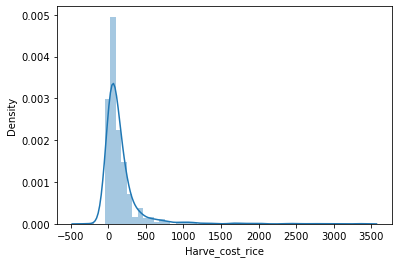

In [29]:
sns.distplot(data['Harve_cost_rice'])

In [61]:
x2=data.iloc[:,:-1]
y2=data.iloc[:,-1]

In [62]:
from sklearn.model_selection import train_test_split
x21_train,x21_test,y21_train,y21_test=train_test_split(x2,y2,test_size=0.2,random_state=0)

In [63]:
from sklearn.feature_selection import mutual_info_regression
mutual_info2=mutual_info_regression(x21_train,y21_train)

In [64]:
mutual_info2 = pd.Series(mutual_info2)
mutual_info2.index = x21_train.columns
mutual_info2.sort_values(ascending=False)

<IPython.core.display.Javascript object>

Gross _output_kg           1.821731
size_hector                0.765840
seed_kg                    0.611240
urea_kg                    0.561034
Total_working_labor_hrs    0.479157
phosphate_kg               0.339806
region                     0.237663
pesticide_rs               0.152400
varieties                  0.111668
price/kg                   0.089656
price_seed_rs/kg           0.081260
wage /hrs                  0.069896
price_urea                 0.062653
price_phosphate            0.062438
status_land                0.000000
dtype: float64

<AxesSubplot:>

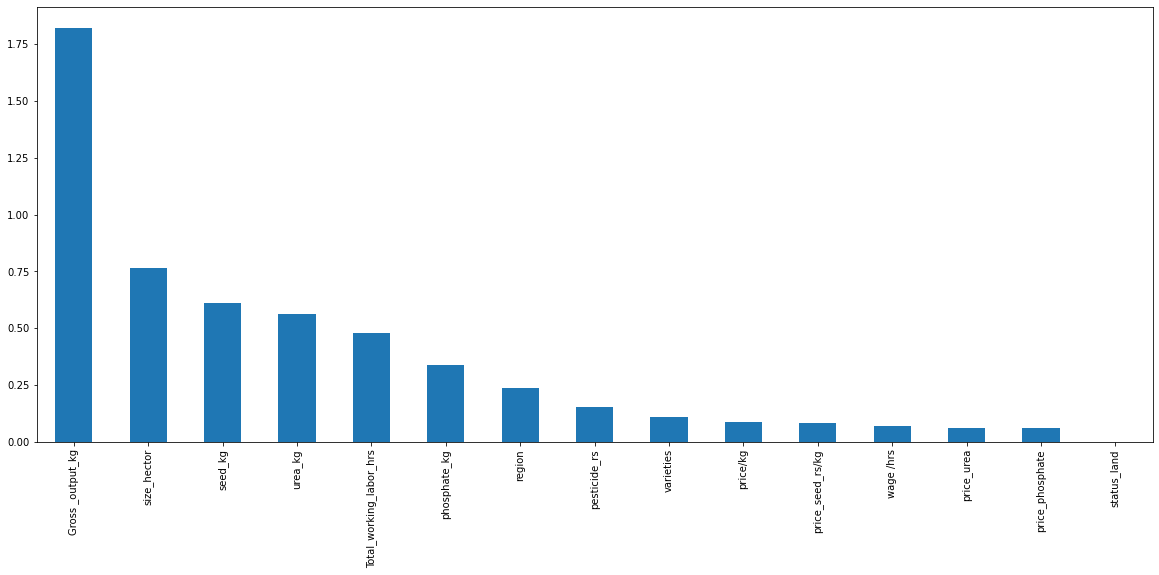

In [65]:
mutual_info2.sort_values(ascending=False).plot.bar(figsize=(20, 8)) 

In [72]:
x22=data1[list(mutual_info2.sort_values(ascending=False).head(1).index)]
x22.head()

,Gross _output_kg
0,7980
1,4083
2,2650
3,4500
4,16300


In [82]:
from sklearn.model_selection import train_test_split
x22_train,x22_test,y22_train,y22_test=train_test_split(x22,y2,test_size=0.2,random_state=7)

In [83]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import BaggingRegressor 

In [84]:
reg2 = LinearRegression()
lasso_reg = linear_model.Lasso(alpha=1, max_iter=100, tol=0.1)
ridge_reg= Ridge(alpha=1, max_iter=500, tol=0.1)
svr_rbf = SVR(kernel= 'linear')
dt = DecisionTreeRegressor()
model2 = neighbors.KNeighborsRegressor(n_neighbors = 7,metric='minkowski',p=1)
xgb_model = xgb.XGBRegressor(base_score=0.5,objective="reg:squarederror", random_state=100)

<IPython.core.display.Javascript object>

In [85]:
for clf in (reg2,dt,lasso_reg,ridge_reg,model2,xgb_model):
    clf.fit(x22_train,y22_train)
    y_pred=clf.predict(x22_test)
    yp_pred=clf.predict(x22_train)
    print(f"output {clf} is : ",r2_score(y22_test,y_pred),r2_score(y22_train,yp_pred))

output LinearRegression() is :  0.9503441161066914 0.9106977418630775
output DecisionTreeRegressor() is :  0.9342727235166947 0.98373403676972
output Lasso(alpha=1, max_iter=100, tol=0.1) is :  0.9503438660805971 0.9106977418575751
output Ridge(alpha=1, max_iter=500, tol=0.1) is :  0.9503441160625424 0.9106977418630775
output KNeighborsRegressor(n_neighbors=7, p=1) is :  0.8692213600622207 0.8948865335886383
output XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
     

In [86]:
pickle.dump(reg2,open('harvesting_cost.pkl','wb'))

<IPython.core.display.Javascript object>